In [1]:
import pandas as pd

Exploratory Data Analysis of Dow Index sentiment from social media posts

In [4]:
folderpath = r"D:\Documents\Docs_oldnew\Anaconda_testtest\\"

In [7]:
##I gathered some tweets about Dow Jones Index in Mar and Apr

import os

csvfiles = []

for file in os.listdir(folderpath):
    if file.endswith(".csv") and file.startswith("DOW"):
        print(file)
        csvfiles.append(file)

DOW_1Apr2020closing_persononly.csv
DOW_6Apr2020morning_persononly.csv
DOW_7Apr2020morning_persononly.csv
DOW_8Apr2020morning_persononly.csv
DOW_9Apr2020closing_persononly.csv
DOW_9Apr2020morning_persononly.csv
DOW_rally_23Mar2020night_persononly.csv
DOW_rally_24Mar2020closing_persononly.csv
DOW_rally_24Mar2020morning_persononly.csv
DOW_rally_25Mar2020morning_persononly.csv
DOW_rally_26Mar2020closing_persononly.csv
DOW_rally_26Mar2020morning_persononly.csv
DOW_slump_10Mar2020_persononly.csv
DOW_slump_11Mar2020_persononly.csv
DOW_slump_12Mar2020_persononly.csv
DOW_slump_16Mar2020_persononly.csv
DOW_slump_17Mar2020_persononly.csv
DOW_slump_18Mar2020_persononly.csv
DOW_slump_23Mar2020_persononly.csv
DOW_slump_27Mar2020closing_persononly.csv
DOW_slump_30Mar2020morning_persononly.csv
DOW_slump_31Mar2020closing_persononly.csv
DOW_slump_9Mar2020_persononly.csv


In [30]:
proto=pd.read_csv(folderpath+file, header=None, parse_dates=[1])
proto[1]

0      2020-03-09 16:53:53+00:00
1      2020-03-09 16:52:25+00:00
2      2020-03-09 16:52:18+00:00
3      2020-03-09 16:52:05+00:00
4      2020-03-09 16:51:41+00:00
                  ...           
3732   2020-02-29 10:35:37+00:00
3733   2020-02-29 09:05:51+00:00
3734   2020-02-29 08:11:25+00:00
3735   2020-02-29 07:26:36+00:00
3736   2020-02-29 06:03:11+00:00
Name: 1, Length: 3737, dtype: datetime64[ns, UTC]

In [31]:
dfs = []

for file in csvfiles:
    df = pd.read_csv(folderpath+file, header=None, parse_dates=[1])
    #print(df.head())
    dfs.append(df)

In [32]:
len(dfs)

23

In [33]:
dfs[0]

,0,1,2,3,4,5
0,1245486165962063872,2020-04-01 23:00:16+00:00,entropy02751825,"NY 20,943.51 4.44% -973.65 [04/01]\nNASDAQ7,36...",ja,"{'id': 1180260893554143232, 'id_str': '1180260..."
1,1245483531142172673,2020-04-01 22:49:48+00:00,ThirdDegree_In,Stocks fall sharply on #America's #WallStreet ...,en,"{'id': 884733272130953217, 'id_str': '88473327..."
2,1245482827581288448,2020-04-01 22:47:00+00:00,poe_salamander,"NY 20,943.51 4.44% -973.65 [04/01]\nNASDAQ7,36...",ja,"{'id': 98220763, 'id_str': '98220763', 'name':..."
3,1245480349099941888,2020-04-01 22:37:09+00:00,uriatama,"NY 20,943.51 4.44% -973.65 [04/01]\nNASDAQ7,36...",ja,"{'id': 876587702983958528, 'id_str': '87658770..."
4,1245478718933434369,2020-04-01 22:30:41+00:00,vas_georgiadis,#Dow #spx #Nasdaq #DAX #FTSE #cac #Nikkei #Chi...,und,"{'id': 3327523839, 'id_str': '3327523839', 'na..."
...,...,...,...,...,...,...
2440,1242691593074868224,2020-03-25 05:55:38+00:00,ibrahimsismn,Tarihe tanklk etmeye devam ediyoruz.\nYarn cok...,tr,"{'id': 282753940, 'id_str': '282753940', 'name..."
2441,1242689239030083584,2020-03-25 05:46:17+00:00,MichaelOngRisk,Stock futures briefly trim losses after report...,en,"{'id': 828281213421027329, 'id_str': '82828121..."
2442,1242688417495834624,2020-03-25 05:43:01+00:00,CentralOffice,Clorox is paying for the memorial. Not one pub...,en,"{'id': 1730378444, 'id_str': '1730378444', 'na..."
2443,1242686768752627714,2020-03-25 05:36:28+00:00,Just_Westy,@gassin123Charts #Dow futures -220 right now. ...,en,"{'id': 163303317, 'id_str': '163303317', 'name..."


In [34]:
dow_dfs =pd.concat(dfs)

In [35]:
len(dow_dfs)

83788

In [36]:
## the data gathered over different dates actually have many repeated entries as the API I used gathers a fixed number of latest tweets within  past 7 days

dow_df=dow_dfs.drop_duplicates()

In [40]:
#remove non-english tweets
en_df = dow_df[dow_df[4]=='en']
en_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52869 entries, 1 to 3734
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   0       52869 non-null  int64              
 1   1       52869 non-null  datetime64[ns, UTC]
 2   2       52869 non-null  object             
 3   3       52869 non-null  object             
 4   4       52869 non-null  object             
 5   5       52869 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 2.8+ MB


In [41]:
en_df.head()

,0,1,2,3,4,5
1,1245483531142172673,2020-04-01 22:49:48+00:00,ThirdDegree_In,Stocks fall sharply on #America's #WallStreet ...,en,"{'id': 884733272130953217, 'id_str': '88473327..."
5,1245478678588321792,2020-04-01 22:30:31+00:00,frankmottek,More pain #WallStreet #MainStreet #Dow slides ...,en,"{'id': 26046662, 'id_str': '26046662', 'name':..."
6,1245475502623604736,2020-04-01 22:17:54+00:00,wijaranakula,TOMORROW IS MAKE OR BREAK!! The #SP500 could b...,en,"{'id': 1010562738840481793, 'id_str': '1010562..."
9,1245472092453101569,2020-04-01 22:04:21+00:00,wijaranakula,TOMORROW IS MAKE OR BREAK!! The #SP500 could b...,en,"{'id': 1010562738840481793, 'id_str': '1010562..."
10,1245470500656218113,2020-04-01 21:58:01+00:00,JeffMenos,Futures for #DOW #SPX #NASDAQ in t -3mins.,en,"{'id': 16635625, 'id_str': '16635625', 'name':..."


In [46]:
en_df_ind =en_df.set_index(1)
en_df_sorted = en_df_ind.sort_index()

In [47]:
en_df_sorted.head()

,0,2,3,4,5
1,,,,,
2020-02-29 08:11:25+00:00,1233666068297768967,GCAssets,Disastrous week for the stock market all week....,en,"{'id': 808700037190520833, 'id_str': '80870003..."
2020-02-29 09:05:51+00:00,1233679767938981888,SaraWalker_IG,.@IGcom weekend markets showing 1% declines fo...,en,"{'id': 2422263679, 'id_str': '2422263679', 'na..."
2020-02-29 10:35:37+00:00,1233702358040768512,IntegrityTiger,BAYER - Thanks for your help.... nice decoy ;)...,en,"{'id': 924010172376260609, 'id_str': '92401017..."
2020-02-29 11:11:52+00:00,1233711480752701440,Lakshmi_888,#SPX $SPX #ES_F #Dow $NQ #NQ #NDX $RUT #RUT #D...,en,"{'id': 4652993655, 'id_str': '4652993655', 'na..."
2020-02-29 11:25:25+00:00,1233714890902208513,ISABELNET_SA,Subscriber Update\n\nThe #stockmarket valuati...,en,"{'id': 1098994585815171073, 'id_str': '1098994..."


In [53]:
en_df_sorted.columns=["id","name","tweet","lang","user_info"]
en_df_gb =en_df_sorted.groupby(by='name')

In [55]:
## count users that have overwhelming number of tweets-- may be marketing/media accounts

en_df_gb.count()

,id,tweet,lang,user_info
name,,,,
000HMY,2,2,2,2
001DanDan,10,10,10,10
0406Guno,19,19,19,19
09072021,109,109,109,109
0Galvardig,4,4,4,4
...,...,...,...,...
zeroheddge,5,5,5,5
zeroleverage,4,4,4,4
zerosum24,19,19,19,19


In [57]:
# 68 users have more than 100 tweets in the collection period
en_df_gb.count().query('tweet>=100')

,id,tweet,lang,user_info
name,,,,
09072021,109,109,109,109
540856,102,102,102,102
6W_Wealth,138,138,138,138
BlueChip48,186,186,186,186
BrainandMoney,136,136,136,136
...,...,...,...,...
twright55,215,215,215,215
usacustomers,146,146,146,146
wealthissimple,112,112,112,112


In [61]:
## still some duplicates exist
en_df_sorted[en_df_sorted['name']=='09072021']

,id,name,tweet,lang,user_info
1,,,,,
2020-03-02 21:11:39+00:00,1234587193827643392,09072021,"In 2003 AND 2009, new bull markets started in ...",en,"{'id': 388150165, 'id_str': '388150165', 'name..."
2020-03-02 21:11:39+00:00,1234587193827643392,09072021,"In 2003 AND 2009, new bull markets started in ...",en,"{'id': 388150165, 'id_str': '388150165', 'name..."
2020-03-02 21:11:39+00:00,1234587193827643392,09072021,"In 2003 AND 2009, new bull markets started in ...",en,"{'id': 388150165, 'id_str': '388150165', 'name..."
2020-03-09 03:49:00+00:00,1236861518253305856,09072021,"...after the 1994 stealth bear. After that, th...",en,"{'id': 388150165, 'id_str': '388150165', 'name..."
2020-03-09 03:49:00+00:00,1236861518253305856,09072021,"...after the 1994 stealth bear. After that, th...",en,"{'id': 388150165, 'id_str': '388150165', 'name..."
...,...,...,...,...,...
2020-04-07 20:24:46+00:00,1247621357837352961,09072021,The bears are coming out of their caves. One s...,en,"{'id': 388150165, 'id_str': '388150165', 'name..."
2020-04-08 20:15:06+00:00,1247981313166061568,09072021,Now the bull is just grinding the bears noses ...,en,"{'id': 388150165, 'id_str': '388150165', 'name..."
2020-04-08 20:15:06+00:00,1247981313166061568,09072021,Now the bull is just grinding the bears noses ...,en,"{'id': 388150165, 'id_str': '388150165', 'name..."


In [70]:
unique_tweets =en_df_sorted['tweet'].unique()

In [73]:
en_df_sim =en_df_sorted.drop(columns=['lang','user_info'])

In [76]:
en_df_clean=en_df_sim.drop_duplicates()

In [92]:
clean_gb=en_df_clean.groupby(by='name')
clean_gb.count().quantile([0.25,0.90])

,id,tweet
0.25,1.0,1.0
0.90,4.0,4.0


In [97]:
writers_list =clean_gb.count().query('tweet > 20').index

In [99]:
en_df_retail = en_df_clean[~en_df_clean['name'].isin(writers_list)] # 7742 rows left, more likely retail-investors
en_df_retail.head()

,id,name,tweet
1,,,
2020-02-29 09:05:51+00:00,1233679767938981888,SaraWalker_IG,.@IGcom weekend markets showing 1% declines fo...
2020-02-29 10:35:37+00:00,1233702358040768512,IntegrityTiger,BAYER - Thanks for your help.... nice decoy ;)...
2020-02-29 12:24:23+00:00,1233729726327525382,The_Machine2020,@Lo2i10 According to data 24600 is key for #Do...
2020-02-29 13:02:24+00:00,1233739297041330177,chartidea8,#Dow #Jones #Industrial #Average #^DJI\nMassiv...
2020-02-29 13:15:50+00:00,1233742676501172224,leverage_cr,#responsibility #yourmove #letstalk\n\nLet's t...


In [105]:
en_df_retail.index.date

array([datetime.date(2020, 2, 29), datetime.date(2020, 2, 29),
       datetime.date(2020, 2, 29), ..., datetime.date(2020, 4, 10),
       datetime.date(2020, 4, 10), datetime.date(2020, 4, 10)],
      dtype=object)

In [152]:
en_df_retail.index.date


array([datetime.date(2020, 2, 29), datetime.date(2020, 2, 29),
       datetime.date(2020, 2, 29), ..., datetime.date(2020, 4, 10),
       datetime.date(2020, 4, 10), datetime.date(2020, 4, 10)],
      dtype=object)

In [119]:
en_df_retail['2020-4-9'] #index dates like this
#en_df_retail['2020-4'] # can also index month like this --- 823 rows

,id,name,tweet
1,,,
2020-04-09 00:08:23+00:00,1248040023422717952,Stallion2011,"Worst pandemic in over 100 years, the world is..."
2020-04-09 00:26:52+00:00,1248044673911881729,IC_Markets,European market close:\n\nWednesday:\n\n#FTSE ...
2020-04-09 00:32:33+00:00,1248046105784451073,RealWillMunny,"Futures up a tiny bit for tomrrow, after a dec..."
2020-04-09 00:37:06+00:00,1248047248568549381,SunSirsCom,#SunSirs: #LME #Lead in the Night #Market Rose...
2020-04-09 00:52:12+00:00,1248051048222208000,evsunny__,Join my Free Stocks Discord Server!\nhttps://t...
...,...,...,...
2020-04-09 21:42:51+00:00,1248365786944745473,me_think_free,Has the market bottomed out yet? #StockMarket ...
2020-04-09 21:58:04+00:00,1248369613739606017,btc_guide,#btcusdt short-term comment 10th April\n\n#btc...
2020-04-09 22:19:38+00:00,1248375043790274560,bsk11,I would think by now for those that said to sh...


In [124]:
en_df_singleday =en_df_retail['2020-4-9'] 
en_df_singleday.head()

en_df_singleday['txt_tokenized'] = en_df_singleday['tweet'].str.split(" ")

C:\Users\gen80\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [125]:
en_df_singleday

,id,name,tweet,txt_tokenized
1,,,,
2020-04-09 00:08:23+00:00,1248040023422717952,Stallion2011,"Worst pandemic in over 100 years, the world is...","[Worst, pandemic, in, over, 100, years,, the, ..."
2020-04-09 00:26:52+00:00,1248044673911881729,IC_Markets,European market close:\n\nWednesday:\n\n#FTSE ...,"[European, market, close:\n\nWednesday:\n\n#FT..."
2020-04-09 00:32:33+00:00,1248046105784451073,RealWillMunny,"Futures up a tiny bit for tomrrow, after a dec...","[Futures, up, a, tiny, bit, for, tomrrow,, aft..."
2020-04-09 00:37:06+00:00,1248047248568549381,SunSirsCom,#SunSirs: #LME #Lead in the Night #Market Rose...,"[#SunSirs:, #LME, #Lead, in, the, Night, #Mark..."
2020-04-09 00:52:12+00:00,1248051048222208000,evsunny__,Join my Free Stocks Discord Server!\nhttps://t...,"[Join, my, Free, Stocks, Discord, Server!\nhtt..."
...,...,...,...,...
2020-04-09 21:42:51+00:00,1248365786944745473,me_think_free,Has the market bottomed out yet? #StockMarket ...,"[Has, the, market, bottomed, out, yet?, #Stock..."
2020-04-09 21:58:04+00:00,1248369613739606017,btc_guide,#btcusdt short-term comment 10th April\n\n#btc...,"[#btcusdt, short-term, comment, 10th, April\n\..."
2020-04-09 22:19:38+00:00,1248375043790274560,bsk11,I would think by now for those that said to sh...,"[I, would, think, by, now, for, those, that, s..."


In [139]:
from collections import Counter
words_singleday = Counter()

for toks in en_df_singleday['txt_tokenized'].tolist():
    words_singleday.update(toks)

In [144]:
## see the counts 

words_singleday.most_common(20)

[('', 66),
 ('up', 21),
 ('will', 17),
 ('I', 15),
 ('market', 13),
 ('points', 12),
 ('#NASDAQ', 11),
 ('US', 10),
 ('it', 9),
 ('over', 8),
 ('out', 8),
 ('what', 8),
 ('UP', 8),
 ('about', 8),
 ('not', 8),
 ('Dow', 8),
 ('week', 8),
 ('down', 7),
 ('after', 7),
 ('now', 7)]

Word Cloud visualization of frequent words on a single day about Dow

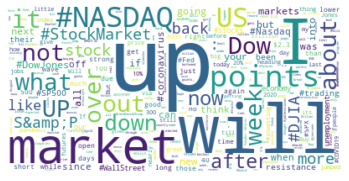

In [145]:
## filter out words that have no meaningful sentiment value

Count_en = words_singleday


from wordcloud import WordCloud
import matplotlib.pyplot as plt

filter_keys = "#Dow|#DOW|#dow|and|at|@|by|have|has|We|we|you|they|this|from|are|&amp;|as|a|the|an|The|to|in|for|of|or|by|with|is|on|that|be| ".split("|")

for key in filter_keys:
    if key in Count_en:
        del Count_en[key]    

wc = WordCloud(background_color="white", max_words=1000)
wc.generate_from_frequencies(Count_en)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [155]:
en_df_singleday['count_up'] = en_df_singleday['txt_tokenized'].apply(lambda x: x.count("up"))

C:\Users\gen80\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [157]:
en_df_singleday.head()

,id,name,tweet,txt_tokenized,count_up
1,,,,,
2020-04-09 00:08:23+00:00,1248040023422717952,Stallion2011,"Worst pandemic in over 100 years, the world is...","[Worst, pandemic, in, over, 100, years,, the, ...",1
2020-04-09 00:26:52+00:00,1248044673911881729,IC_Markets,European market close:\n\nWednesday:\n\n#FTSE ...,"[European, market, close:\n\nWednesday:\n\n#FT...",0
2020-04-09 00:32:33+00:00,1248046105784451073,RealWillMunny,"Futures up a tiny bit for tomrrow, after a dec...","[Futures, up, a, tiny, bit, for, tomrrow,, aft...",1
2020-04-09 00:37:06+00:00,1248047248568549381,SunSirsCom,#SunSirs: #LME #Lead in the Night #Market Rose...,"[#SunSirs:, #LME, #Lead, in, the, Night, #Mark...",0
2020-04-09 00:52:12+00:00,1248051048222208000,evsunny__,Join my Free Stocks Discord Server!\nhttps://t...,"[Join, my, Free, Stocks, Discord, Server!\nhtt...",0


In [158]:
#do the up/down count on whole data

en_df_retail['txt_tokenized'] = en_df_retail['tweet'].str.split(" ")
en_df_retail['count_up'] = en_df_retail['txt_tokenized'].apply(lambda x: x.count("up"))
en_df_retail['count_down'] = en_df_retail['txt_tokenized'].apply(lambda x: x.count("down"))
en_df_retail

C:\Users\gen80\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gen80\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\gen80\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,id,name,tweet,txt_tokenized,count_up,count_down
1,,,,,,
2020-02-29 09:05:51+00:00,1233679767938981888,SaraWalker_IG,.@IGcom weekend markets showing 1% declines fo...,"[.@IGcom, weekend, markets, showing, 1%, decli...",0,0
2020-02-29 10:35:37+00:00,1233702358040768512,IntegrityTiger,BAYER - Thanks for your help.... nice decoy ;)...,"[BAYER, -, Thanks, for, your, help...., nice, ...",0,0
2020-02-29 12:24:23+00:00,1233729726327525382,The_Machine2020,@Lo2i10 According to data 24600 is key for #Do...,"[@Lo2i10, According, to, data, 24600, is, key,...",0,0
2020-02-29 13:02:24+00:00,1233739297041330177,chartidea8,#Dow #Jones #Industrial #Average #^DJI\nMassiv...,"[#Dow, #Jones, #Industrial, #Average, #^DJI\nM...",0,0
2020-02-29 13:15:50+00:00,1233742676501172224,leverage_cr,#responsibility #yourmove #letstalk\n\nLet's t...,"[#responsibility, #yourmove, #letstalk\n\nLet'...",0,0
...,...,...,...,...,...,...
2020-04-10 01:36:44+00:00,1248424645188939776,crypto_goat_,More than 16 million Americans have lost their...,"[More, than, 16, million, Americans, have, los...",0,0
2020-04-10 01:41:19+00:00,1248425796416331776,cramesthename,I dont think this market is v-bottoming the re...,"[I, dont, think, this, market, is, v-bottoming...",0,0
2020-04-10 02:07:36+00:00,1248432412100456448,EricDirnbach,Perhaps I speak for most when I say fuuuuuuck ...,"[Perhaps, I, speak, for, most, when, I, say, f...",0,0


In [161]:
## stat for a single day
en_df_retail['2020-4-9'][['count_up','count_down']].sum()

count_up      21
count_down     7
dtype: int64

In [188]:
## group by datetime index -- perfect for charting!

gb_date =en_df_retail.groupby(en_df_retail.index.date)
counts_df =gb_date.sum()
counts_df=counts_df.reset_index()
counts_df.head()

,index,id,count_up,count_down
0,2020-02-29,4.441696e+19,1.0,2.0
1,2020-03-01,8.268636e+19,1.0,6.0
2,2020-03-02,3.135725e+20,49.0,12.0
3,2020-03-03,2.889522e+20,16.0,33.0
4,2020-03-04,2.112205e+20,28.0,16.0


Visualization of correlation between sentiment and stock index movement

In [171]:
import altair as alt
alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

In [196]:
type(counts_df['index'])
counts_df['index'].astype(str)

0     2020-02-29
1     2020-03-01
2     2020-03-02
3     2020-03-03
4     2020-03-04
5     2020-03-05
6     2020-03-06
7     2020-03-07
8     2020-03-08
9     2020-03-09
10    2020-03-10
11    2020-03-11
12    2020-03-12
13    2020-03-13
14    2020-03-14
15    2020-03-15
16    2020-03-16
17    2020-03-17
18    2020-03-18
19    2020-03-19
20    2020-03-20
21    2020-03-21
22    2020-03-22
23    2020-03-23
24    2020-03-24
25    2020-03-25
26    2020-03-26
27    2020-03-27
28    2020-03-28
29    2020-03-29
30    2020-03-30
31    2020-03-31
32    2020-04-01
33    2020-04-02
34    2020-04-03
35    2020-04-04
36    2020-04-05
37    2020-04-06
38    2020-04-07
39    2020-04-08
40    2020-04-09
41    2020-04-10
Name: index, dtype: object

In [199]:
counts_df['index'] = counts_df['index'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [204]:
counts_melt =pd.melt(counts_df,id_vars='index', value_vars=['count_up','count_down'])

In [205]:
counts_melt.head()

,index,variable,value
0,2020-02-29,count_up,1.0
1,2020-03-01,count_up,1.0
2,2020-03-02,count_up,49.0
3,2020-03-03,count_up,16.0
4,2020-03-04,count_up,28.0


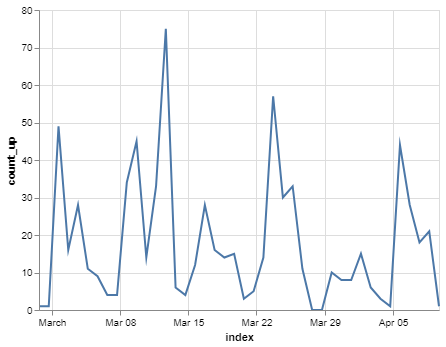

In [200]:
alt.Chart(counts_df).mark_line().encode(
x='index:T', y='count_up:Q')

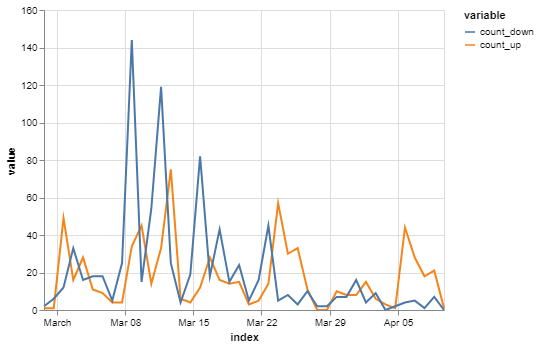

In [207]:
alt.Chart(counts_melt).mark_line().encode(
x='index:T', y='value:Q', color='variable:N')

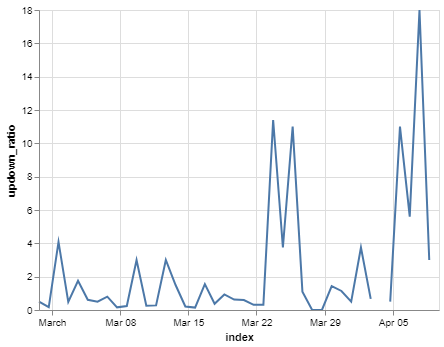

In [209]:
counts_df['updown_ratio'] = counts_df['count_up']/ counts_df['count_down']
alt.Chart(counts_df).mark_line().encode(
x='index:T', y='updown_ratio:Q')

In [224]:
dow_df=pd.read_csv("D:\\Downloads\\^DJI_2017-2020Apr.csv",parse_dates=['Date'])

filtermask = (dow_df['Date'] > '2020-2-29') &  (dow_df['Date'] <= '2020-4-10')
dow_in_period =dow_df[filtermask][['Date','Close']]
dow_in_period 

,Date,Close
727,2020-03-02,26703.320313
728,2020-03-03,25917.410156
729,2020-03-04,27090.859375
730,2020-03-05,26121.279297
731,2020-03-06,25864.779297
732,2020-03-09,23851.019531
733,2020-03-10,25018.160156
734,2020-03-11,23553.220703
735,2020-03-12,21200.619141
736,2020-03-13,23185.619141


In [229]:
dow_in_period.Date
#counts_df['index'] #dtype: object

dow_in_period.Date = dow_in_period.Date.apply(lambda x: x.strftime('%Y-%m-%d'))

In [231]:
counts_compare = pd.merge(counts_df,dow_in_period, left_on='index',right_on='Date')

In [215]:
counts_compare = counts_df
counts_compare['dow_close'] = dow_df[filtermask]['Close']

In [239]:
counts_compare['downup_ratio'] = 1/counts_compare['updown_ratio']
counts_compare

,index,id,count_up,count_down,updown_ratio,dow_close,Date,Close,downup_ratio
0,2020-03-02,3.135725e+20,49.0,12.0,4.083333,NaN,2020-03-02,26703.320313,0.244898
1,2020-03-03,2.889522e+20,16.0,33.0,0.484848,NaN,2020-03-03,25917.410156,2.062500
2,2020-03-04,2.112205e+20,28.0,16.0,1.750000,NaN,2020-03-04,27090.859375,0.571429
3,2020-03-05,2.372312e+20,11.0,18.0,0.611111,NaN,2020-03-05,26121.279297,1.636364
4,2020-03-06,2.039259e+20,9.0,18.0,0.500000,NaN,2020-03-06,25864.779297,2.000000
5,2020-03-09,1.008182e+21,34.0,144.0,0.236111,NaN,2020-03-09,23851.019531,4.235294
6,2020-03-10,3.501712e+20,45.0,15.0,3.000000,NaN,2020-03-10,25018.160156,0.333333
7,2020-03-11,3.416241e+20,14.0,54.0,0.259259,NaN,2020-03-11,23553.220703,3.857143
8,2020-03-12,9.743964e+20,33.0,119.0,0.277311,NaN,2020-03-12,21200.619141,3.606061
9,2020-03-13,4.421321e+20,75.0,25.0,3.000000,NaN,2020-03-13,23185.619141,0.333333


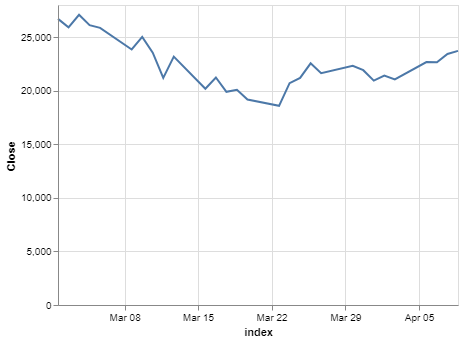

In [234]:
alt.Chart(counts_compare).mark_line().encode(
x='index:T',y='Close:Q')

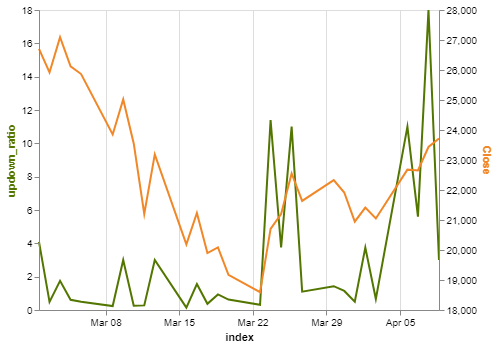

In [242]:
base = alt.Chart(counts_compare).mark_line().encode(
x='index:T')

line1 = base.mark_line(color='#527600').encode( alt.Y('updown_ratio:Q', axis=alt.Axis(titleColor='#527600') ))
line2 = base.mark_line(color='#F18727').encode(  alt.Y('Close:Q', axis=alt.Axis(titleColor='#F18727'),
          scale=alt.Scale(domain=(18000, 28000) )))

alt.layer(line1, line2).resolve_scale(y='independent')

## some correlation. but not obvious as leading/lagging indicator. 

# in sync is likely as ppl tweet after they saw. just the ratio may show pent-up sentiment outburst

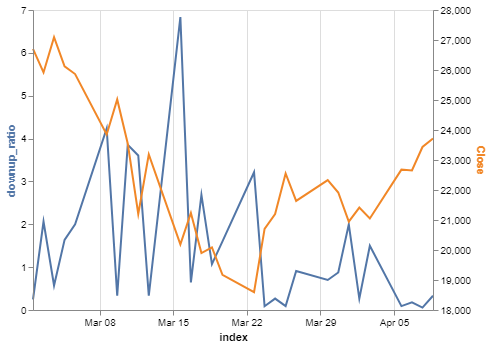

In [240]:
## check the inverse downup ratio
base = alt.Chart(counts_compare).mark_line().encode(
x='index:T')

line1 = base.mark_line(color='#5276A7').encode( alt.Y('downup_ratio:Q', axis=alt.Axis(titleColor='#5276A7') ))
line2 = base.mark_line(color='#F18727').encode(  alt.Y('Close:Q', axis=alt.Axis(titleColor='#F18727'),
          scale=alt.Scale(domain=(18000, 28000) )))

alt.layer(line1, line2).resolve_scale(y='independent')

## down-up ratio peaks when Dow fell for a few days in a row, arousing more attention and nerves. 
## fell to 0 when Dow starts to rebound from bottom. 
## but rise inproportionately(?) at slight retreat tracking a few days of rebound. showing reignited worries that the market resume bear market phase 2

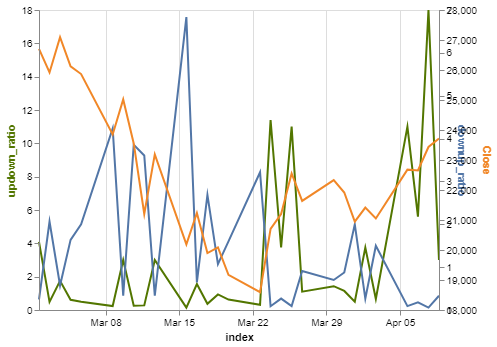

In [241]:
base = alt.Chart(counts_compare).mark_line().encode(
x='index:T')

line0 = base.mark_line(color='#527600').encode( alt.Y('updown_ratio:Q', axis=alt.Axis(titleColor='#527600') ))
line1 = base.mark_line(color='#5276A7').encode( alt.Y('downup_ratio:Q', axis=alt.Axis(titleColor='#5276A7') ))
line2 = base.mark_line(color='#F18727').encode(  alt.Y('Close:Q', axis=alt.Axis(titleColor='#F18727'),
          scale=alt.Scale(domain=(18000, 28000) )))

alt.layer(line0, line1, line2).resolve_scale(y='independent')

In [111]:
en_df_retail [en_df_retail.index >= '2020-4-9']

#filter between two dates
### mask = (df['birth_date'] > start_date) & (df['birth_date'] <= end_date)

,id,name,tweet
1,,,
2020-04-09 00:08:23+00:00,1248040023422717952,Stallion2011,"Worst pandemic in over 100 years, the world is..."
2020-04-09 00:26:52+00:00,1248044673911881729,IC_Markets,European market close:\n\nWednesday:\n\n#FTSE ...
2020-04-09 00:32:33+00:00,1248046105784451073,RealWillMunny,"Futures up a tiny bit for tomrrow, after a dec..."
2020-04-09 00:37:06+00:00,1248047248568549381,SunSirsCom,#SunSirs: #LME #Lead in the Night #Market Rose...
2020-04-09 00:52:12+00:00,1248051048222208000,evsunny__,Join my Free Stocks Discord Server!\nhttps://t...
...,...,...,...
2020-04-10 01:36:44+00:00,1248424645188939776,crypto_goat_,More than 16 million Americans have lost their...
2020-04-10 01:41:19+00:00,1248425796416331776,cramesthename,I dont think this market is v-bottoming the re...
2020-04-10 02:07:36+00:00,1248432412100456448,EricDirnbach,Perhaps I speak for most when I say fuuuuuuck ...
